In [1]:
# Import the libraries required for exploration and preproccesing
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [7]:
# Give names to the features
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ["(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio) (P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)"]
col_names = index_names + setting_names + sensor_names

base_path = r"C:\Users\ushmi\Downloads\NP zipp\CMaps"

train_file_path = base_path + r"\train_FD001.txt"
test_file_path  = base_path + r"\test_FD001.txt"
rul_file_path   = base_path + r"\RUL_FD001.txt"

# Read data
df_train = pd.read_csv(train_file_path, sep=r"\s+", header=None, names=col_names)
df_test = pd.read_csv(test_file_path, sep=r"\s+", header=None, names=col_names)
df_test_RUL = pd.read_csv(rul_file_path, sep=r"\s+", header=None, names=["RUL"])

In [8]:
df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
df_test.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio) (P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [10]:
import matplotlib.pyplot as plt

In [23]:
df_eng = df_train[df_train['engine'] == engine_id]


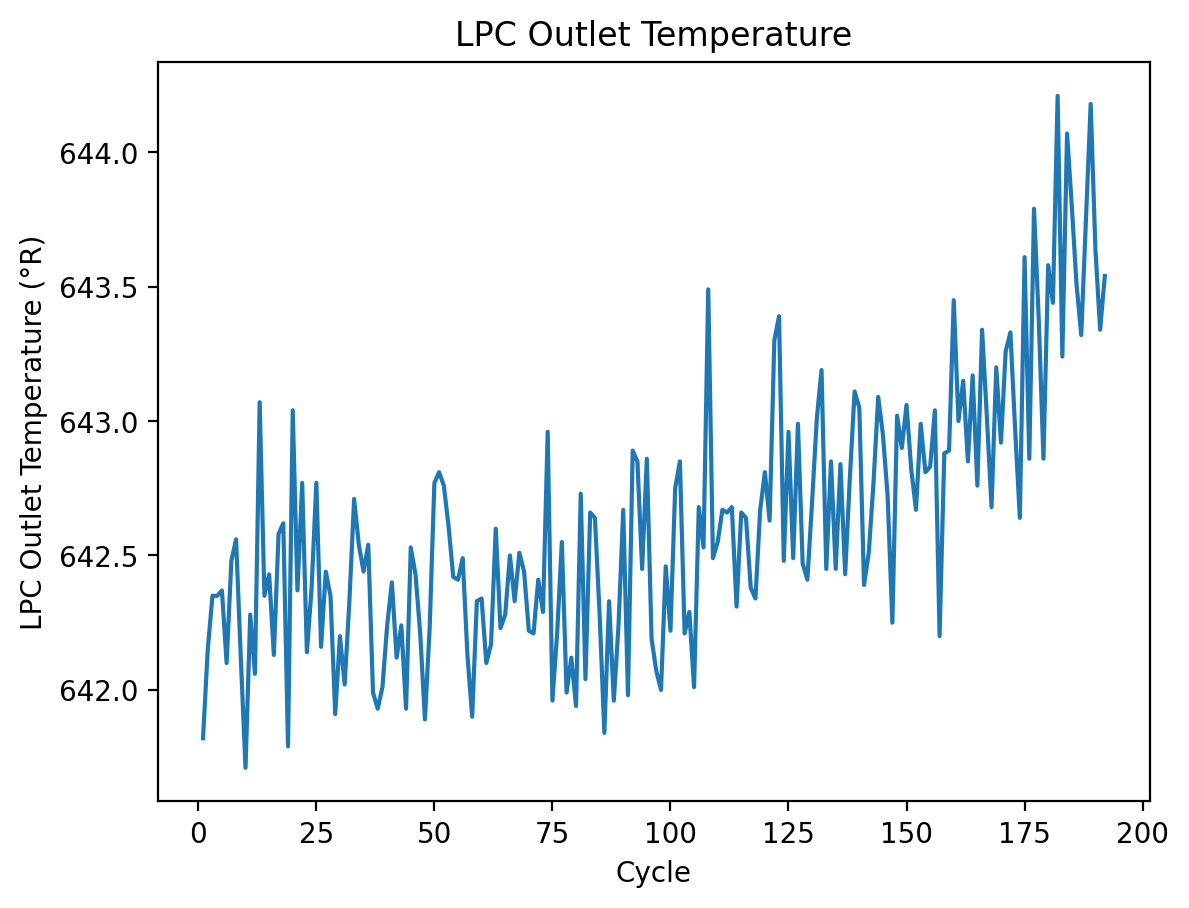

In [17]:
plt.plot(
    df_eng['cycle'],
    df_eng['(LPC outlet temperature) (◦R)']
)

plt.xlabel('Cycle')
plt.ylabel('LPC Outlet Temperature (°R)')
plt.title('LPC Outlet Temperature')
plt.show()

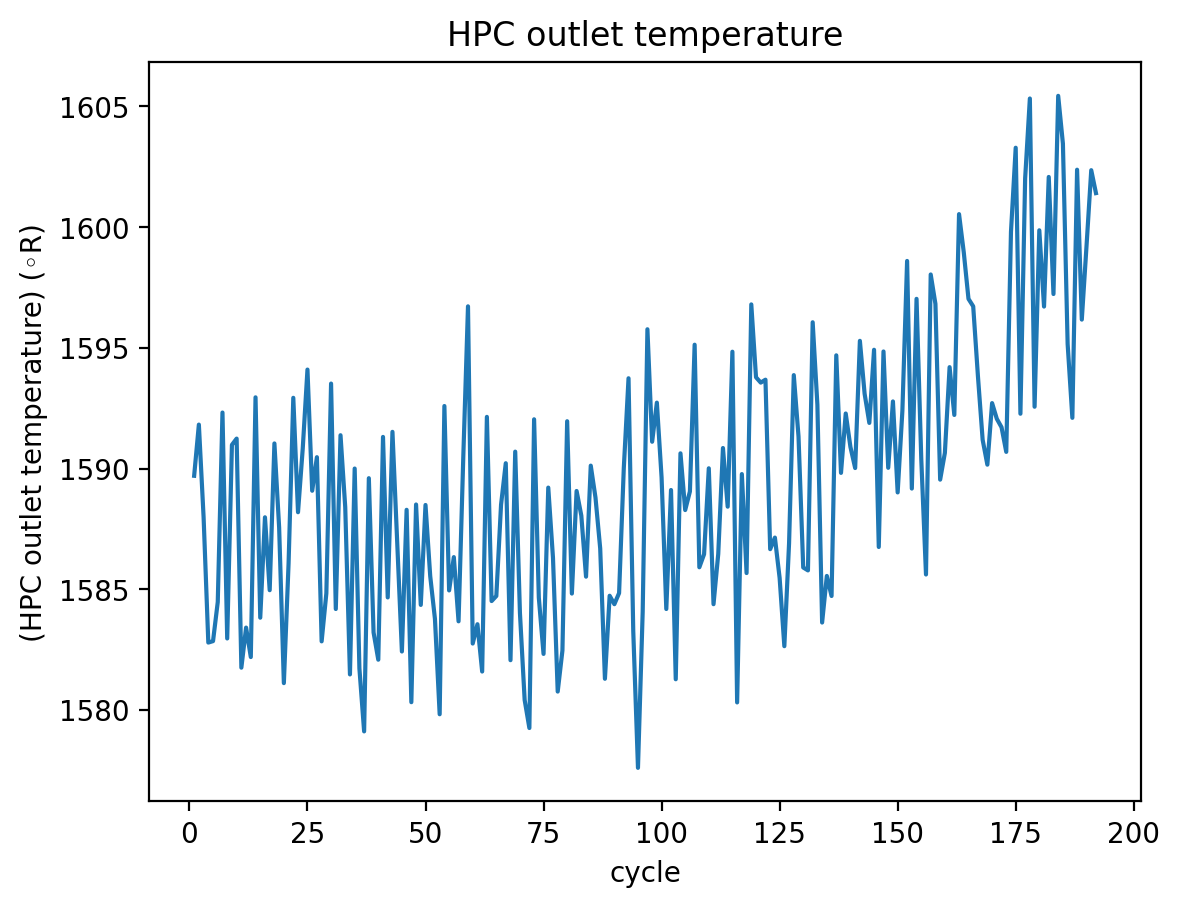

In [20]:
plt.plot(
    df_eng['cycle'],
    df_eng['(HPC outlet temperature) (◦R)']
)
plt.xlabel('cycle')
plt.ylabel('(HPC outlet temperature) (◦R)')
plt.title('HPC outlet temperature')
plt.show()

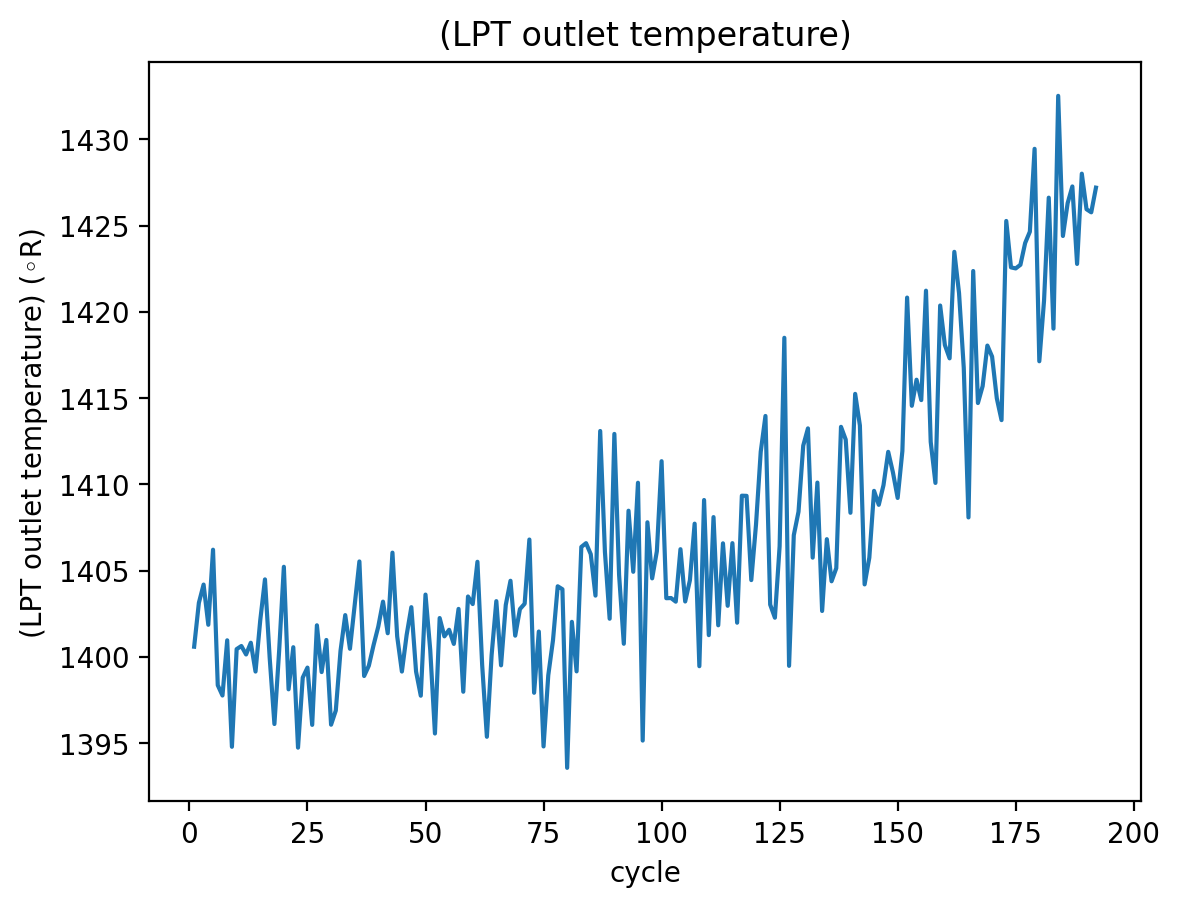

In [21]:
plt.plot(
    df_eng['cycle'],
    df_eng['(LPT outlet temperature) (◦R)']
)
plt.xlabel('cycle')
plt.ylabel('(LPT outlet temperature) (◦R)')
plt.title('(LPT outlet temperature)')
plt.show()

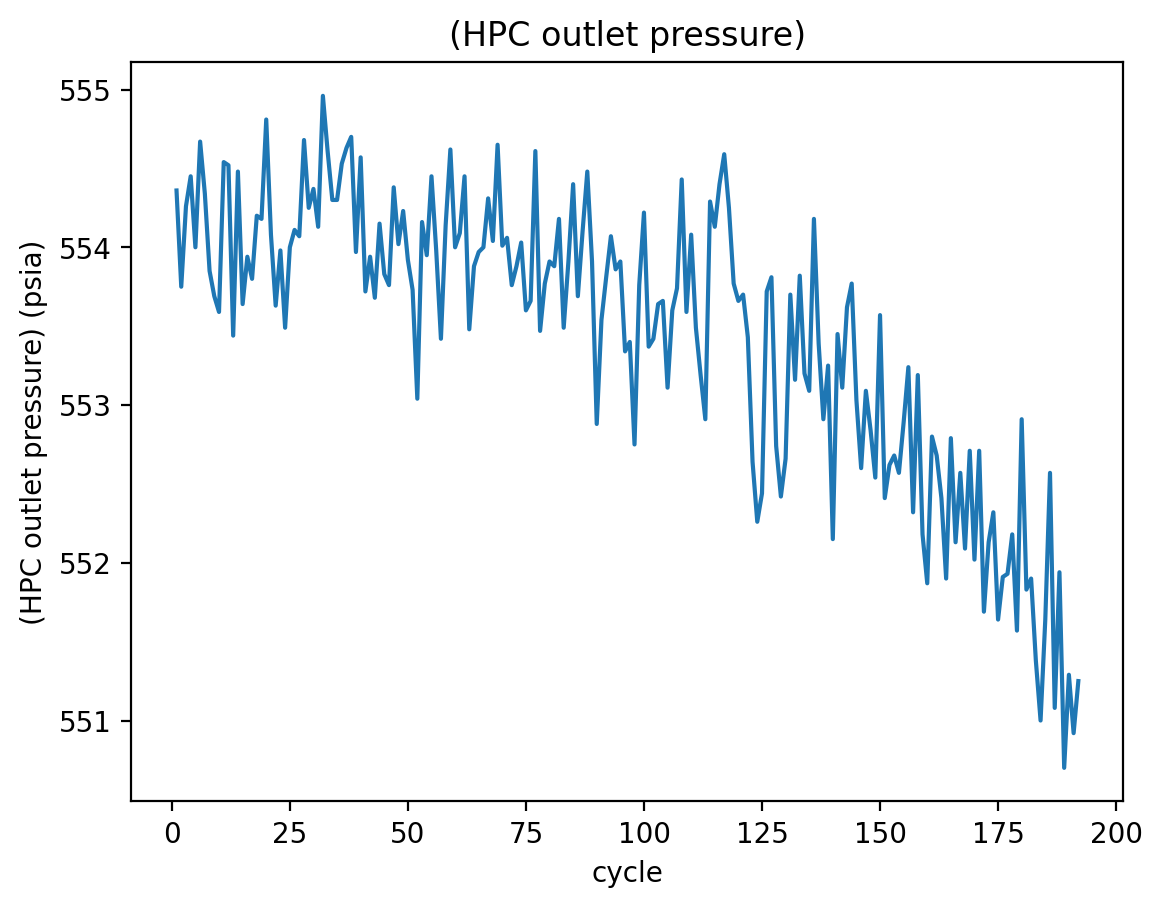

In [24]:
plt.plot(
    df_eng['cycle'],
    df_eng['(HPC outlet pressure) (psia)']
)
plt.xlabel('cycle')
plt.ylabel('(HPC outlet pressure) (psia)')
plt.title('(HPC outlet pressure)')
plt.show()

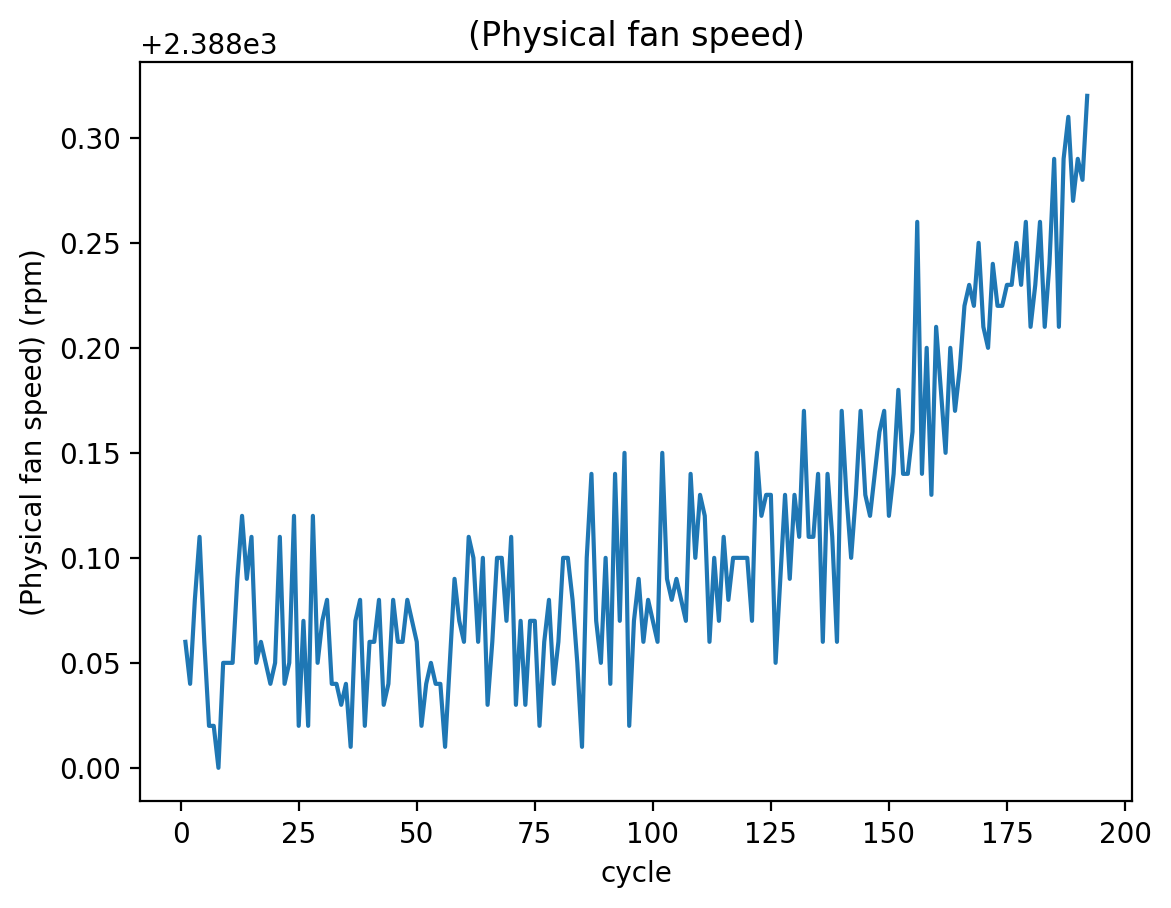

In [25]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Physical fan speed) (rpm)']
)
plt.xlabel('cycle')
plt.ylabel('(Physical fan speed) (rpm)')
plt.title('(Physical fan speed)')
plt.show()

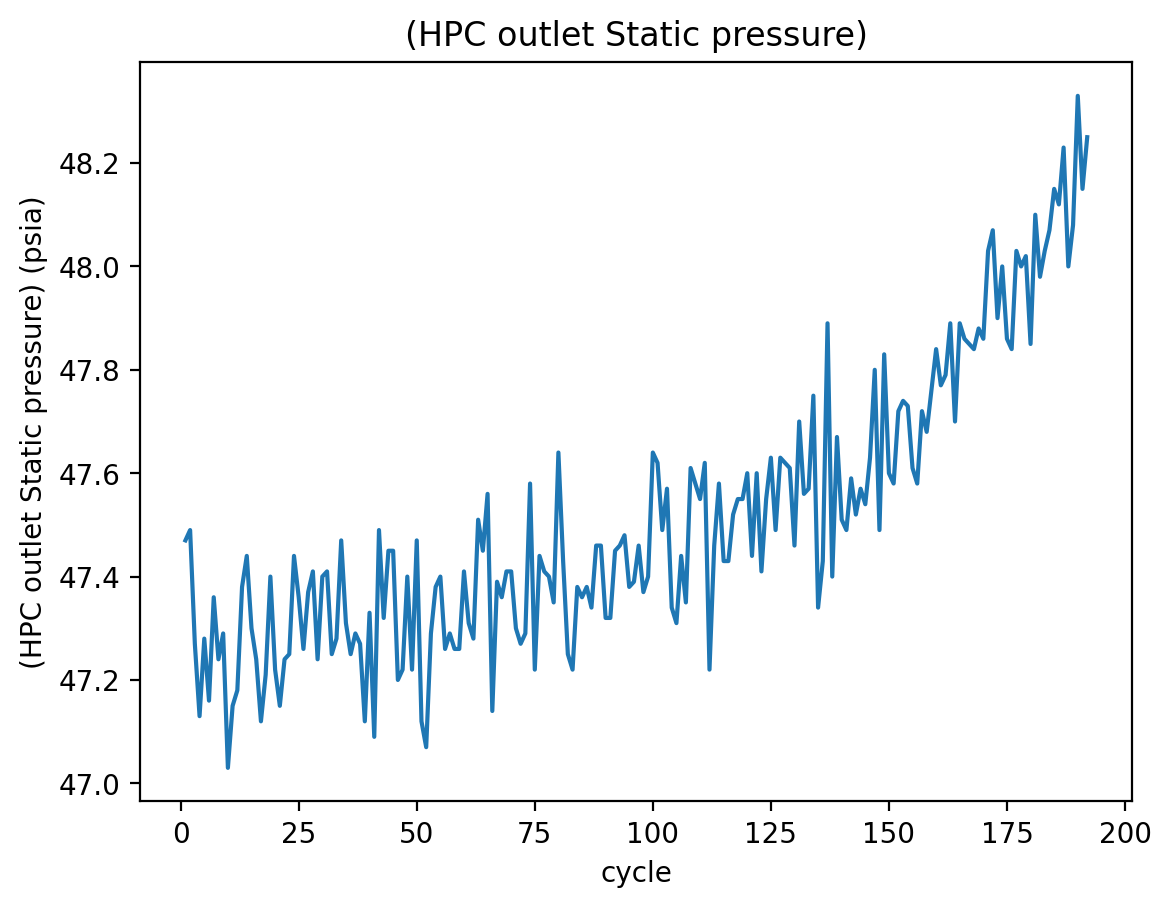

In [27]:
plt.plot(
    df_eng['cycle'],
    df_eng['(HPC outlet Static pressure) (psia)']
)
plt.xlabel('cycle')
plt.ylabel('(HPC outlet Static pressure) (psia)')
plt.title('(HPC outlet Static pressure)')
plt.show()

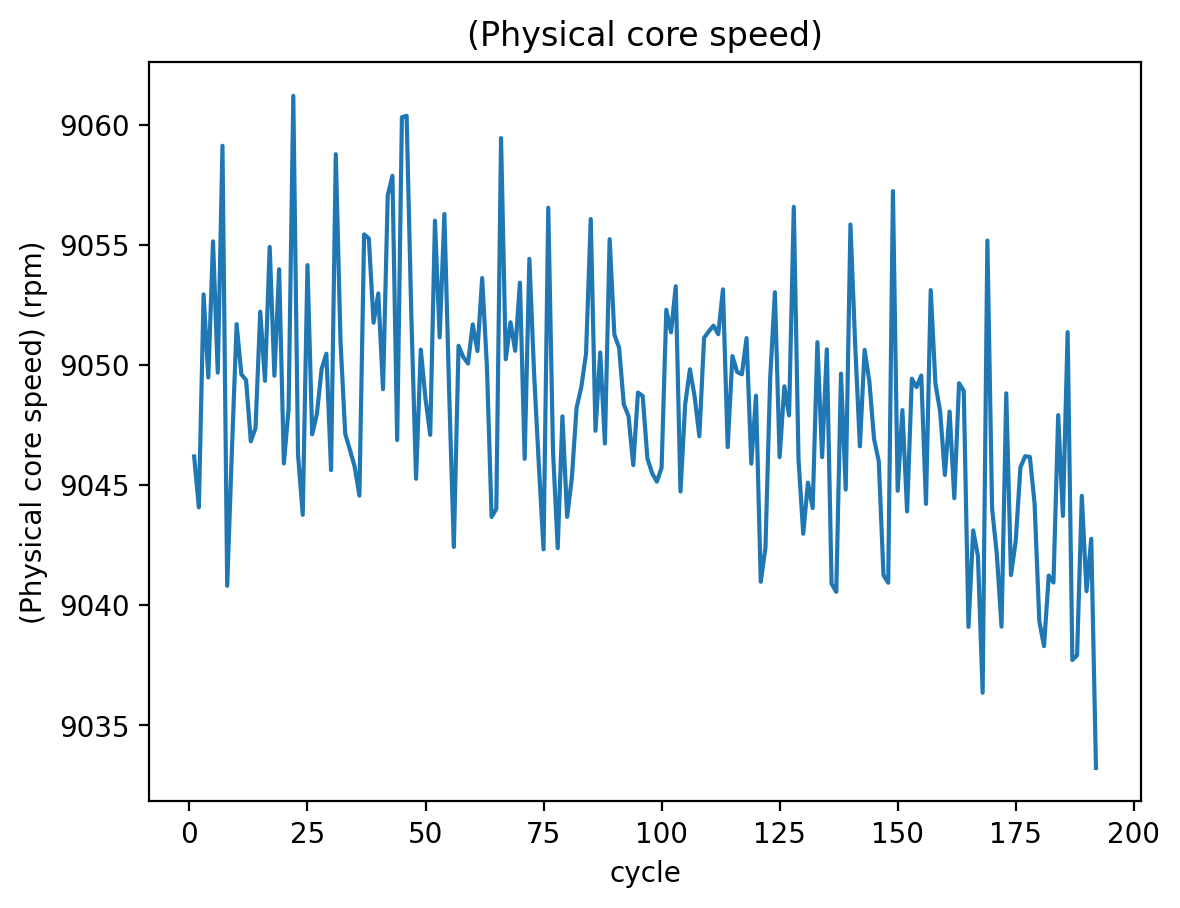

In [26]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Physical core speed) (rpm)']
)
plt.xlabel('cycle')
plt.ylabel('(Physical core speed) (rpm)')
plt.title('(Physical core speed)')
plt.show()

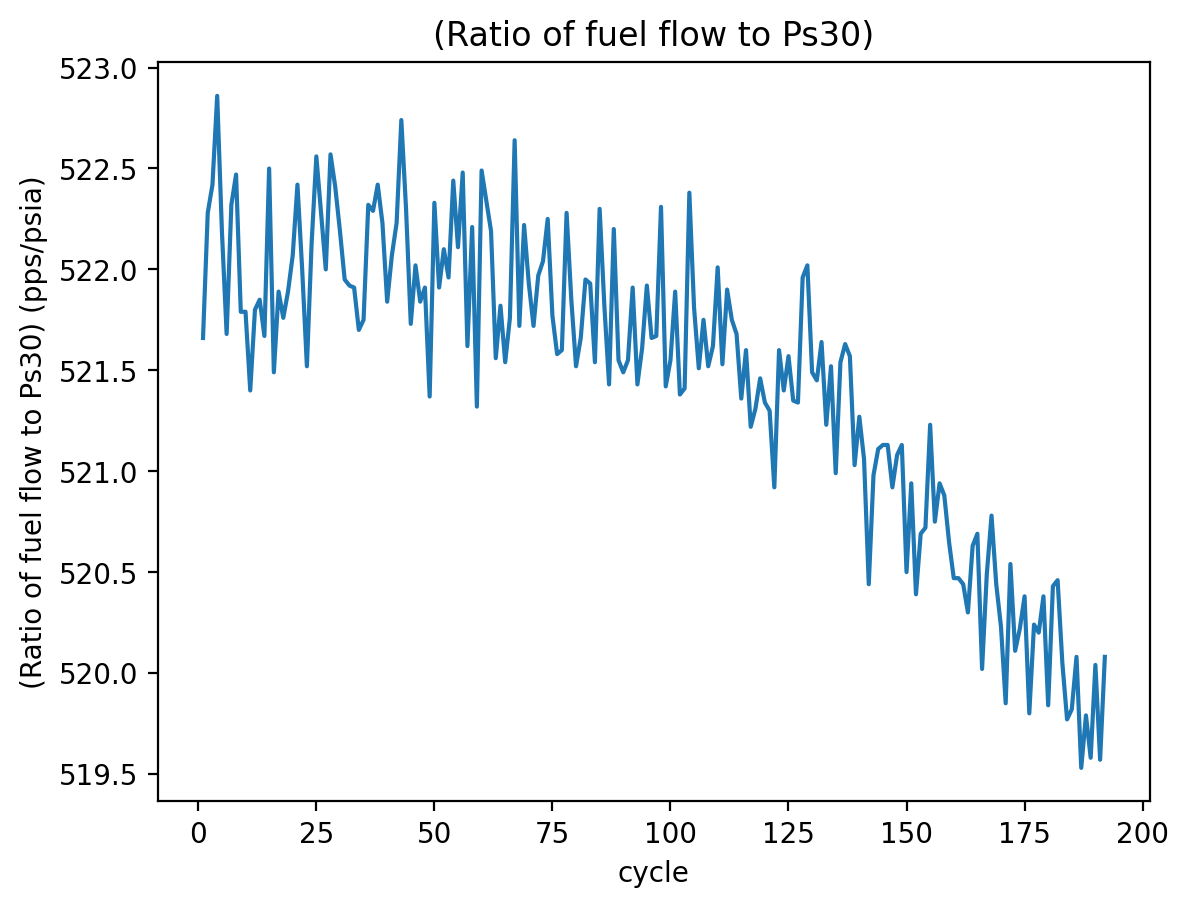

In [28]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Ratio of fuel flow to Ps30) (pps/psia)']
)
plt.xlabel('cycle')
plt.ylabel('(Ratio of fuel flow to Ps30) (pps/psia)')
plt.title('(Ratio of fuel flow to Ps30)')
plt.show()

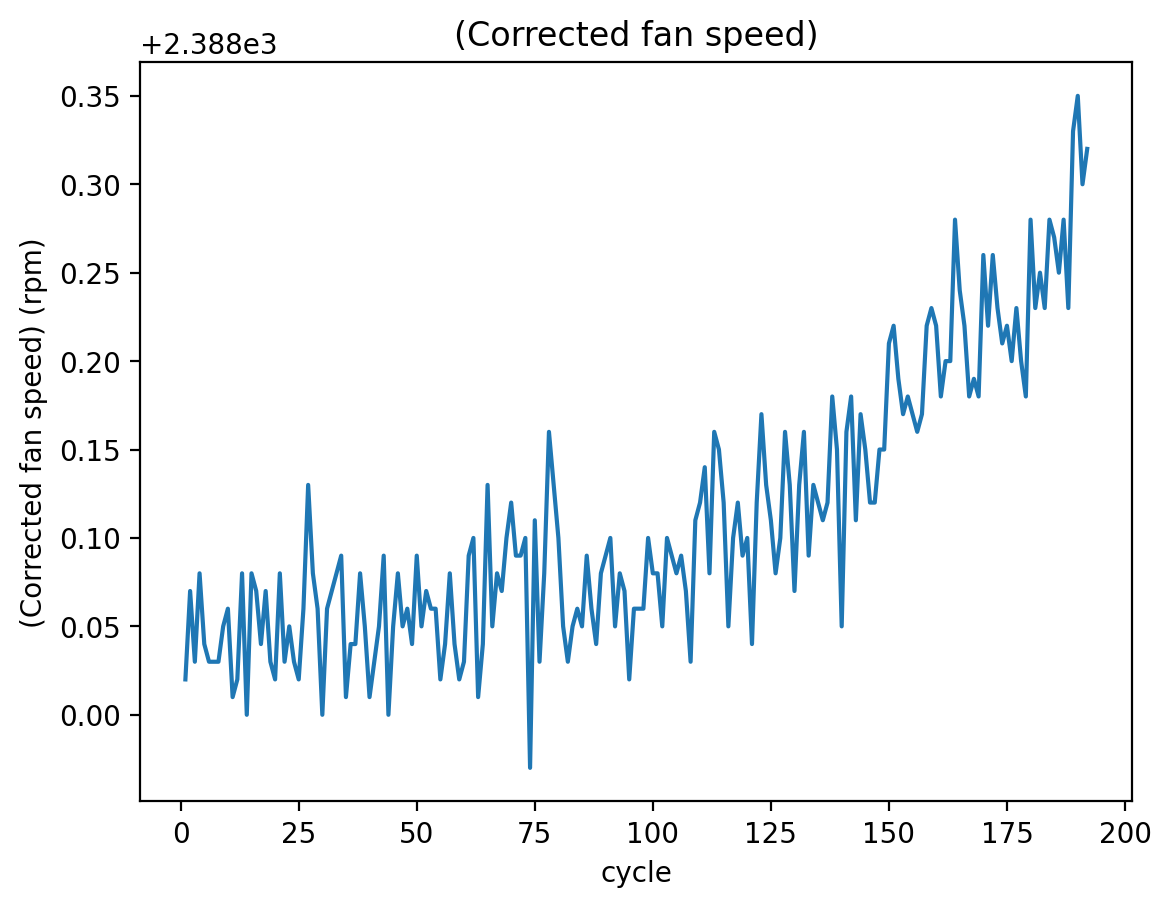

In [29]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Corrected fan speed) (rpm)']
)
plt.xlabel('cycle')
plt.ylabel('(Corrected fan speed) (rpm)')
plt.title('(Corrected fan speed)')
plt.show()

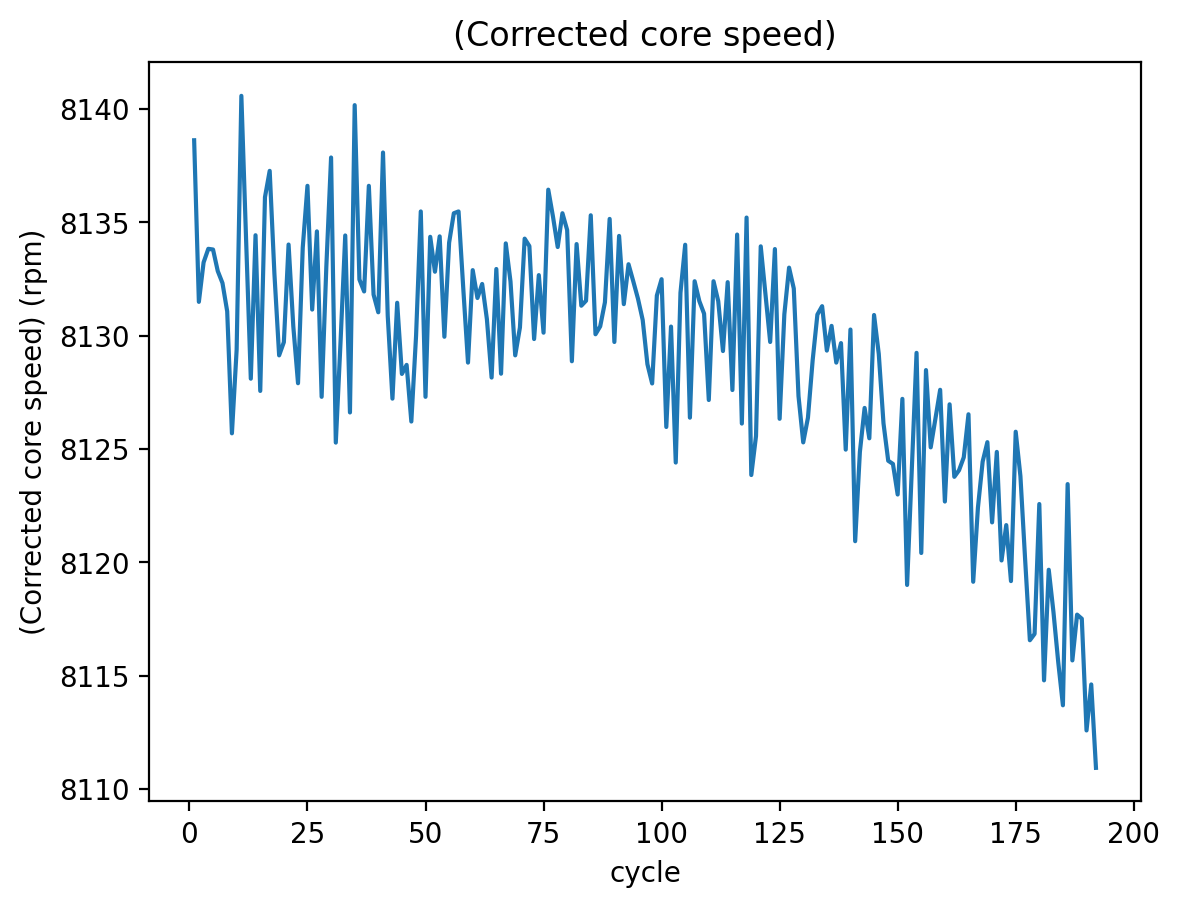

In [30]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Corrected core speed) (rpm)']
)
plt.xlabel('cycle')
plt.ylabel('(Corrected core speed) (rpm)')
plt.title('(Corrected core speed)')
plt.show()

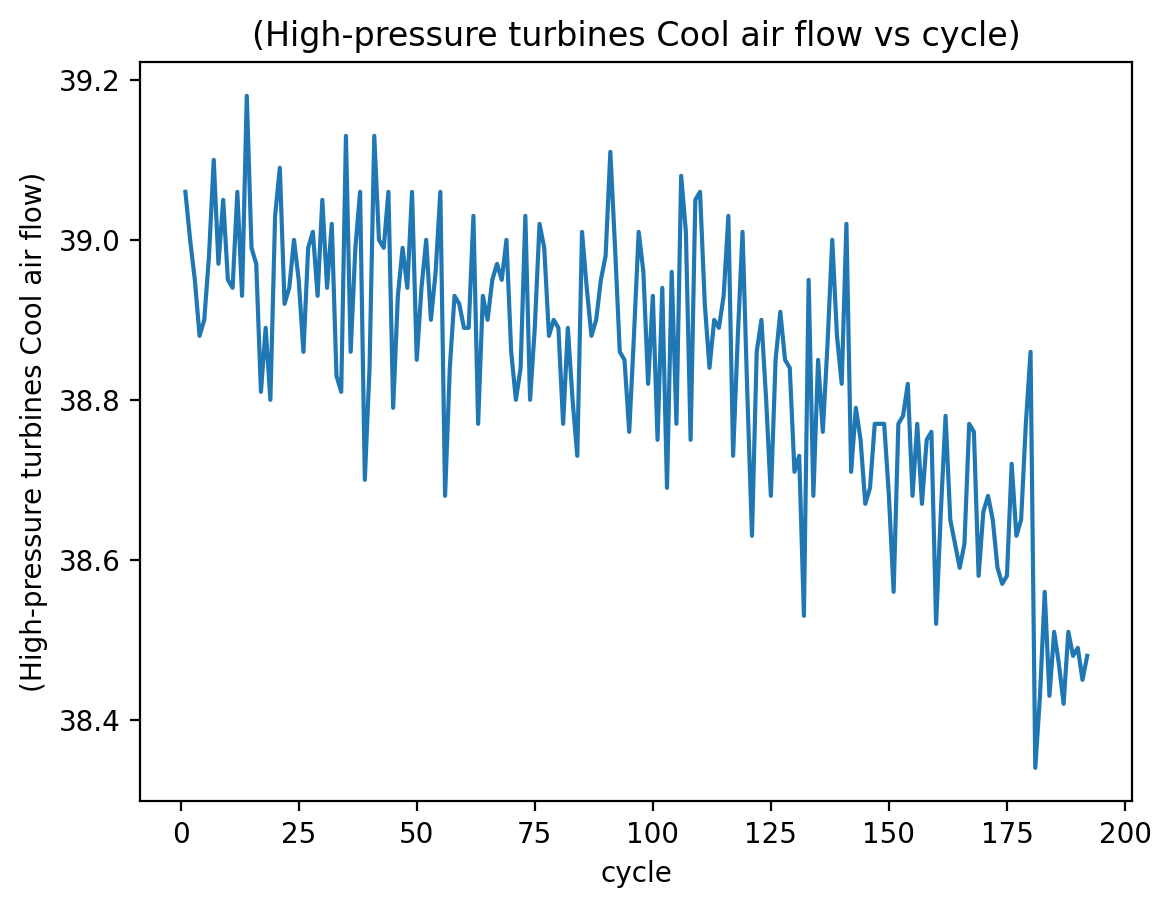

In [35]:
plt.plot(
    df_eng['cycle'],
    df_eng['(High-pressure turbines Cool air flow)']
)
plt.xlabel('cycle')
plt.ylabel('(High-pressure turbines Cool air flow)')
plt.title('(High-pressure turbines Cool air flow vs cycle)')
plt.show()

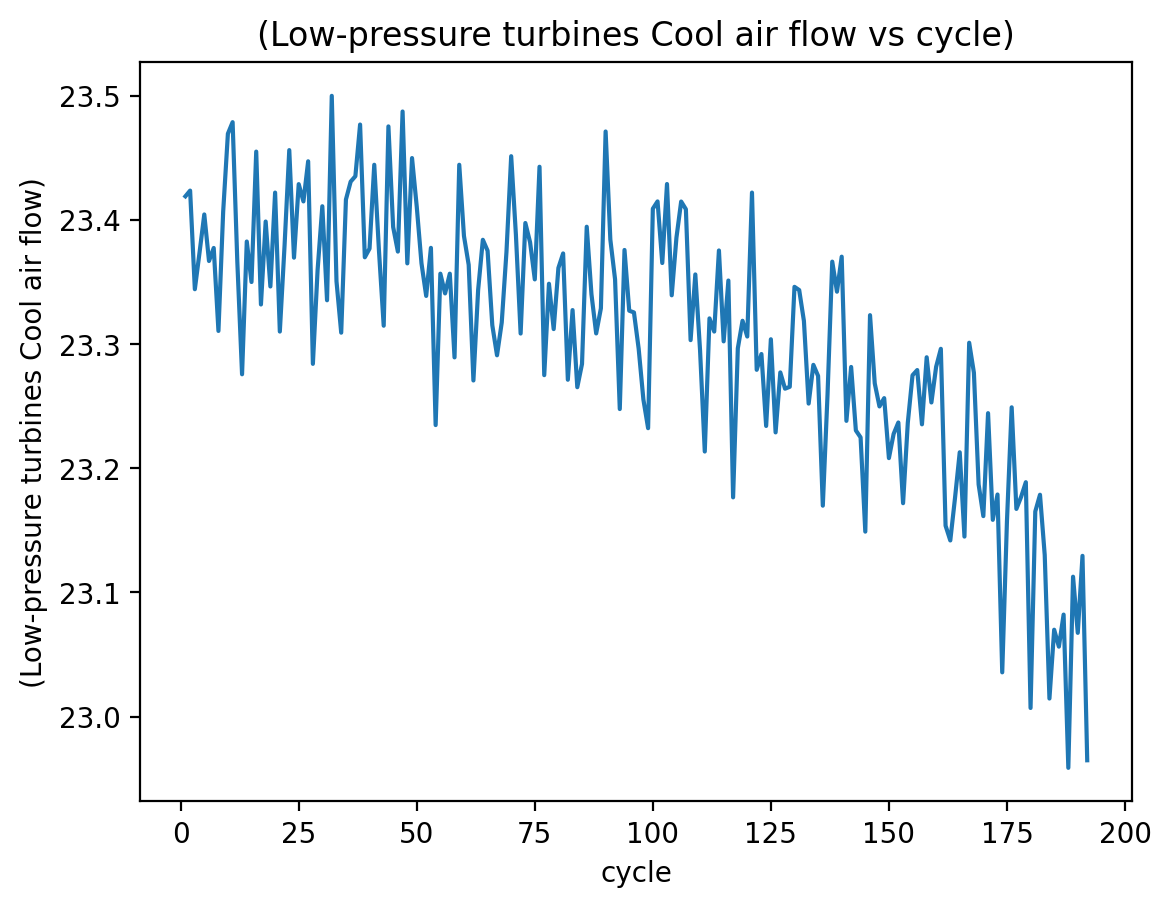

In [36]:
plt.plot(
    df_eng['cycle'],
    df_eng['(Low-pressure turbines Cool air flow)']
)
plt.xlabel('cycle')
plt.ylabel('(Low-pressure turbines Cool air flow)')
plt.title('(Low-pressure turbines Cool air flow vs cycle)')
plt.show()